No handles with labels found to put in legend.


Top principal component is  [-0.70710678 -0.70710678]
Projection of the first example is 1.481.
Recovered approximation of the first example is  [-1.04741883 -1.04741883]


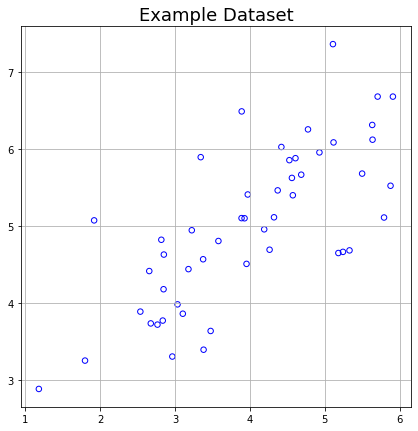

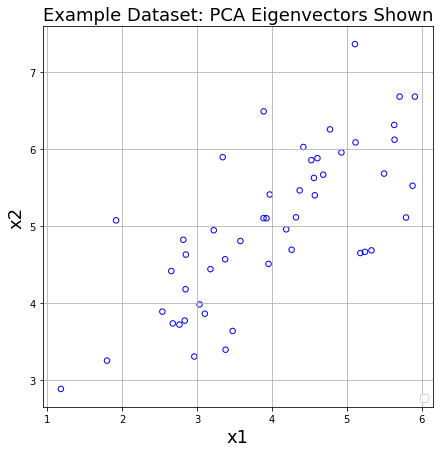

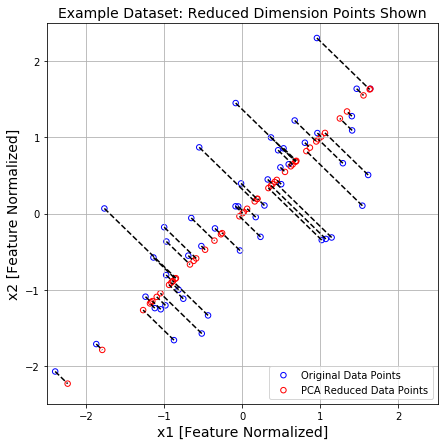

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io
from scipy import linalg


def feature_normalize(samples):
    """
    Feature-normalize samples
    :param samples: samples.
    :return: normalized feature
    """
    mu = np.mean(samples, axis=0)
    X_norm = samples - mu
    # Set Delta Degrees of Freedom (ddof) to 1, to compute
    # the std based on a sample and not the population.
    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm / sigma
    
    return X_norm


def get_usv(sample_norm):
    m, n = sample_norm.shape
    U = np.zeros(n)
    S = np.zeros(n)
    
    # When computing the covariance matrix, we have
    # to divide by m (the number of examples).
    sigma = (1. / m) * np.dot(sample_norm.T, sample_norm)
    
    # Compute the eigenvectors and eigenvalues
    # of the covariance matrix.
    U, S, V = linalg.svd(sigma)
    S = linalg.diagsvd(S, len(S), len(S))

    return U, S

def project_data(samples, U, K):
    """
    Computes the reduced data representation when
    projecting only on to the top "K" eigenvectors
    """

    # Reduced U is the first "K" columns in U
    Z = np.zeros((samples.shape[0], K)) 
    U_reduce = U[:,:K]
    Z = np.dot(samples, U_reduce)

    return Z

def recover_data(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    
    # Compute the approximation of the data by projecting back
    # onto the original space using the top K eigenvectors in U.
    U_reduce = U[:,: K]
    X_rec = np.dot(Z, U_reduce.T)

    return X_rec


def main():
    datafile = 'data/data1.mat'
    mat = scipy.io.loadmat(datafile)
    samples = mat['X']

    plt.figure(figsize=(7, 7))
    plt.scatter(samples[:, 0], samples[:, 1], s=30, facecolors='none', edgecolors='b')
    plt.title("Example Dataset", fontsize=18)
    plt.grid(True)
    # Feature normalize

    samples_norm = feature_normalize(samples)

    # Run SVD

    U = None  # IMPLEMENT U.
    U, S = get_usv(samples_norm)


    # output the top principal component (eigen- vector) found
    # should expect to see an output of about [-0.707 -0.707]"
    print('Top principal component is ', U[:, 0])


    plt.figure(figsize=(7, 7))
    plt.scatter(samples[:, 0], samples[:, 1], s=30, facecolors='none', edgecolors='b')
    plt.title("Example Dataset: PCA Eigenvectors Shown", fontsize=18)
    plt.xlabel('x1', fontsize=18)
    plt.ylabel('x2', fontsize=18)
    plt.grid(True)
    # To draw the principal component, you draw them starting
    # at the mean of the data

    # IMPLEMENT PLOT

    plt.legend(loc=4)

    # project the first example onto the first dimension
    # should see a value of about 1.481"

    z = project_data(samples_norm, U, 1)
    print('Projection of the first example is %0.3f.' % float(z[0]))
    recovered_sample = recover_data(z, U, 1)
    print('Recovered approximation of the first example is ', recovered_sample[0])

    plt.figure(figsize=(7, 7))
    plt.scatter(samples_norm[:, 0], samples_norm[:, 1], s=30, facecolors='none',
                edgecolors='b', label='Original Data Points')
    plt.scatter(recovered_sample[:, 0], recovered_sample[:, 1], s=30, facecolors='none',
                edgecolors='r', label='PCA Reduced Data Points')

    plt.title("Example Dataset: Reduced Dimension Points Shown", fontsize=14)
    plt.xlabel('x1 [Feature Normalized]', fontsize=14)
    plt.ylabel('x2 [Feature Normalized]', fontsize=14)
    plt.grid(True)

    for x in range(samples_norm.shape[0]):
        plt.plot([samples_norm[x, 0], recovered_sample[x, 0]], [samples_norm[x, 1], recovered_sample[x, 1]], 'k--')

    plt.legend(loc=4)
    plt.xlim((-2.5, 2.5))
    plt.ylim((-2.5, 2.5))
    plt.show()


if __name__ == '__main__':
    main()
